In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the dataset:
file_path = 'heart_disease_uci.csv'
df = pd.read_csv(file_path)

In [22]:
# Preprocessing:

# Remove columns with high missing values
df.drop(columns=['slope', 'ca', 'thal'], inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='median')
df[['trestbps', 'chol', 'thalch', 'oldpeak']] = imputer.fit_transform(df[['trestbps', 'chol', 'thalch', 'oldpeak']])

# Encode categorical variables
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})
df = pd.get_dummies(df, columns=['cp', 'restecg', 'dataset'])

# Drop the 'id' column
df.drop(columns=['id'], inplace=True)

# Splitting the dataset
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute any NaN values in the training and test sets
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [23]:
# Data Description:
df.describe()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
count,920.000000,920.000000,920.000000,920.000000,830.000000,920.000000,865.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,131.995652,199.908696,0.166265,137.692391,0.389595,0.853261,0.995652,0.539130,0.189130,0.221739,0.050000,0.204348,0.598913,0.194565,0.330435,0.318478,0.133696,0.217391
std,9.424685,0.408148,18.451300,109.040171,0.372543,25.145235,0.487941,1.058049,1.142693,0.498738,0.391825,0.415642,0.218063,0.403444,0.490385,0.396081,0.470626,0.466140,0.340510,0.412695
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,177.750000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,140.000000,0.000000,0.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>]], dtype=object)

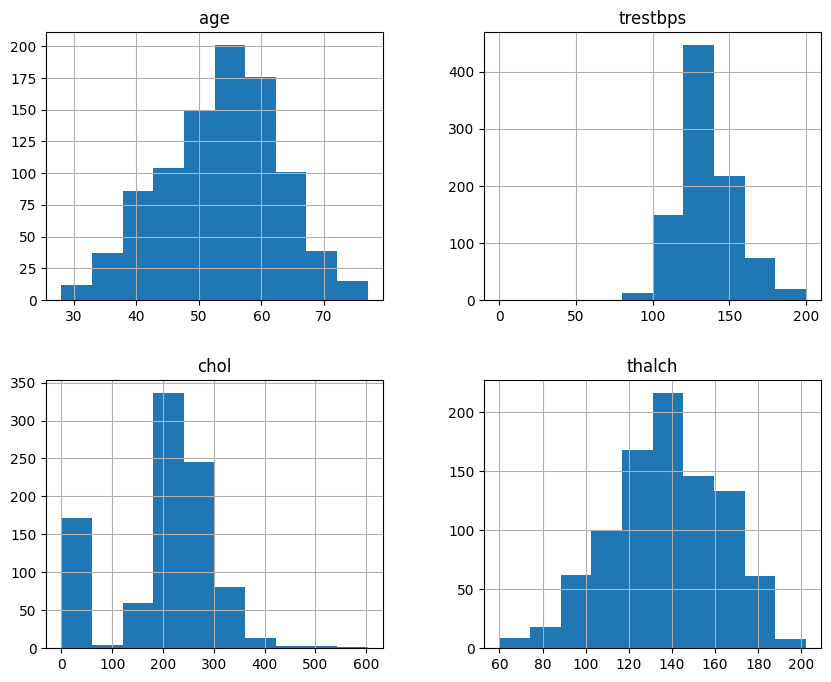

In [24]:
# Histograms:

# Histograms for numeric variables (Showing ammount of data for feature)
numeric_columns = ['age', 'trestbps', 'chol', 'thalch']

df[numeric_columns].hist(figsize=(10, 8))

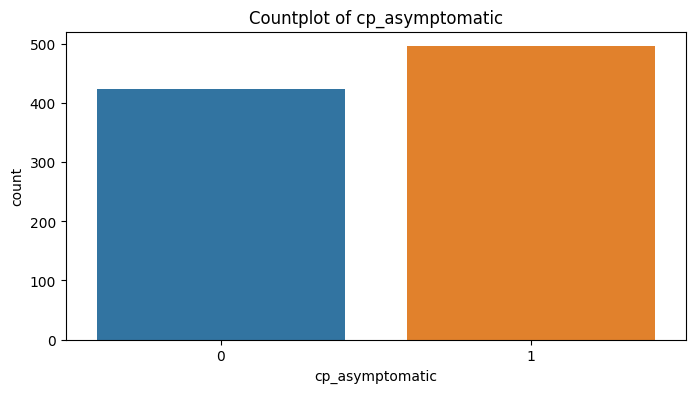

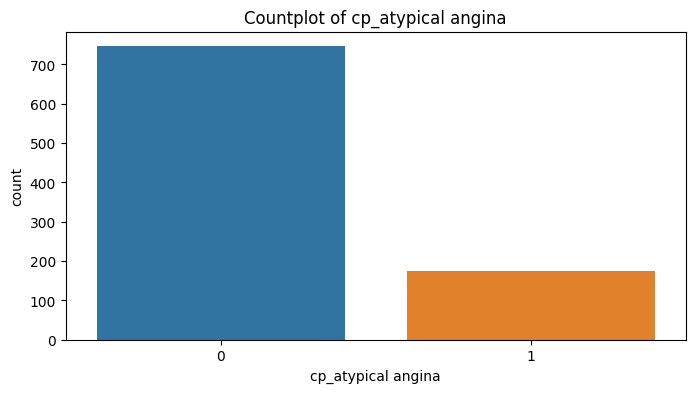

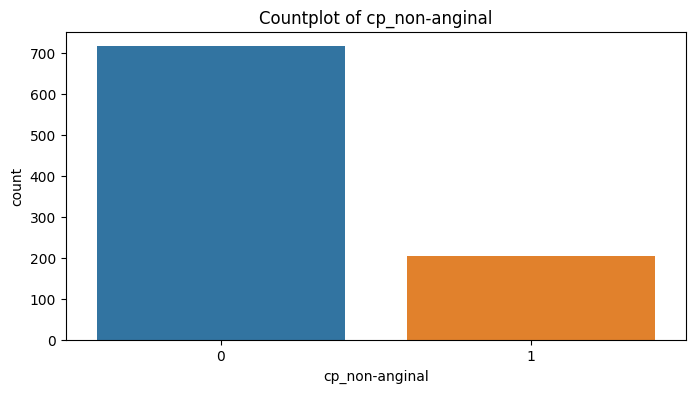

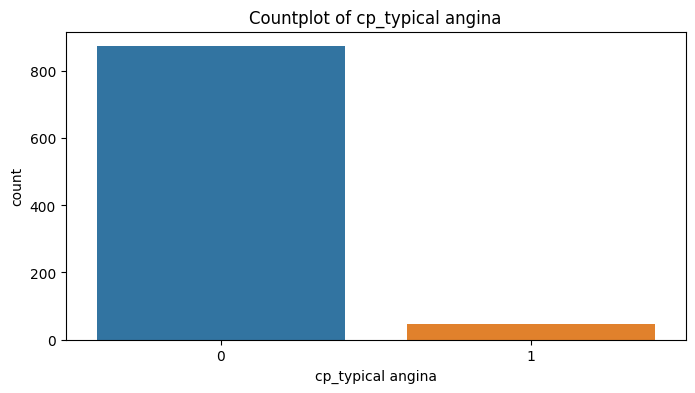

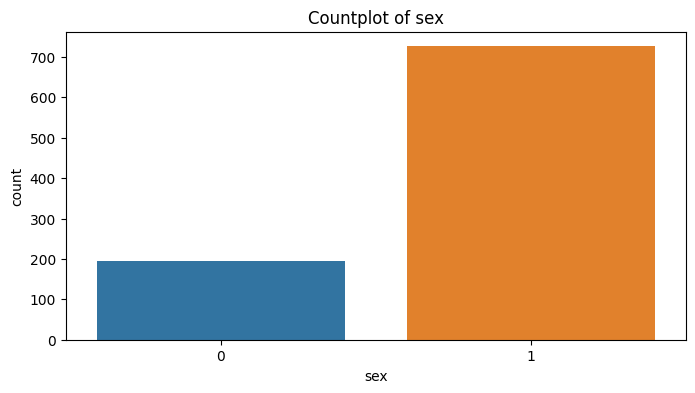

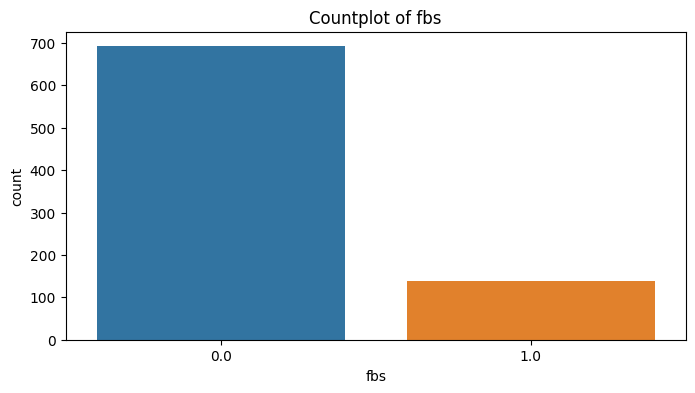

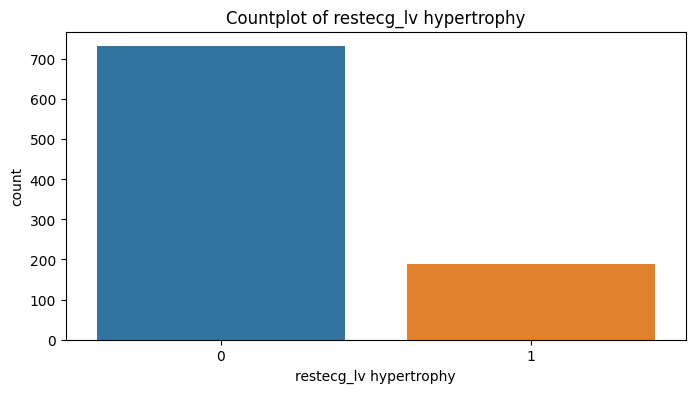

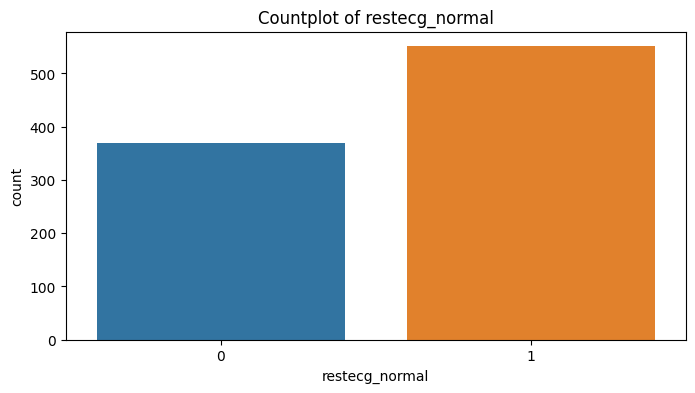

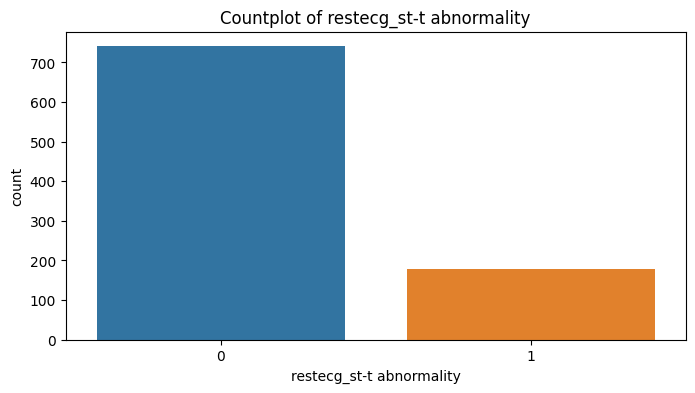

In [25]:
# Bar Graphs
binary_columns = ['sex', 'fbs']
cp_columns = [col for col in df.columns if 'cp_' in col] # Identifying the new columns created from 'cp'
restecg_columns = [col for col in df.columns if 'restecg_' in col] # Identifying the new columns created from 'restecg'

# Plotting each of these new columns
for col in cp_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()

# Plotting 'sex' and 'fbs'

for col in binary_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()

# Plotting each of these new columns for 'restecg'
for col in restecg_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()

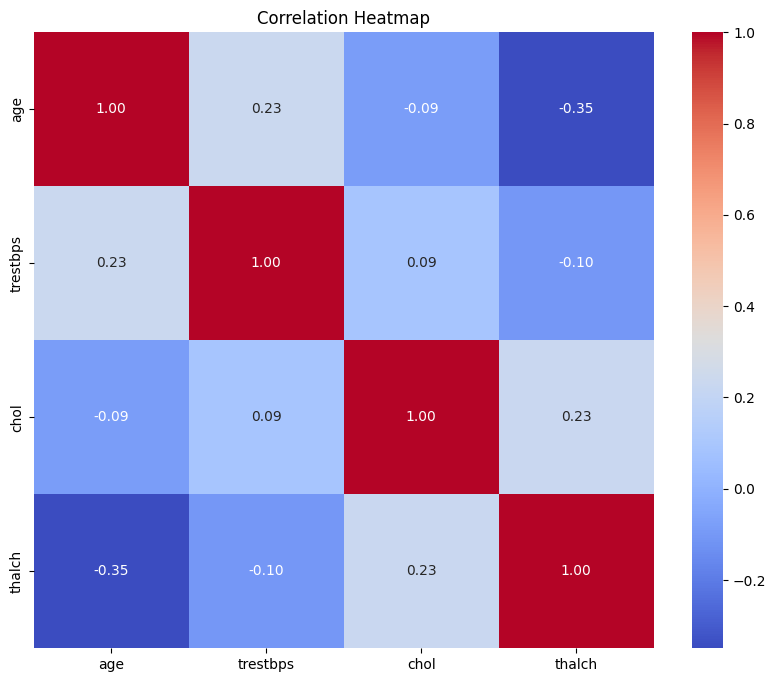

In [26]:
# Heat Map

# Compute the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

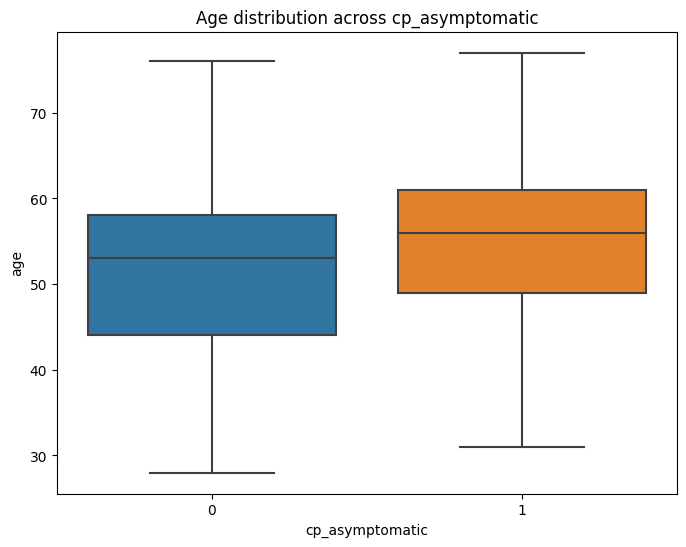

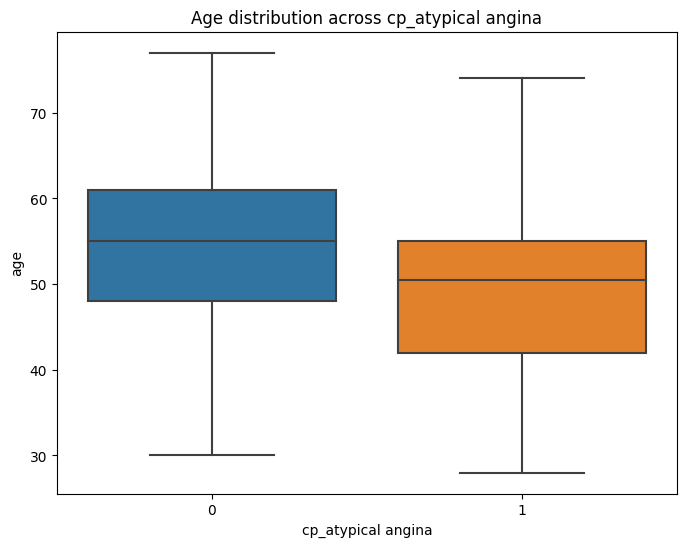

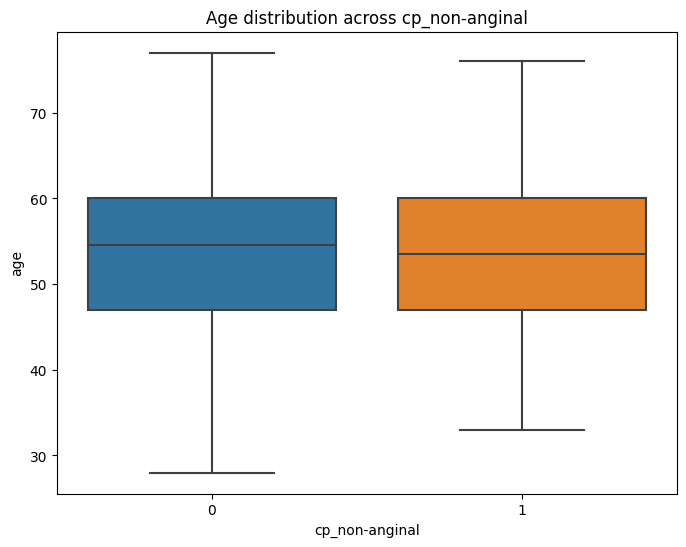

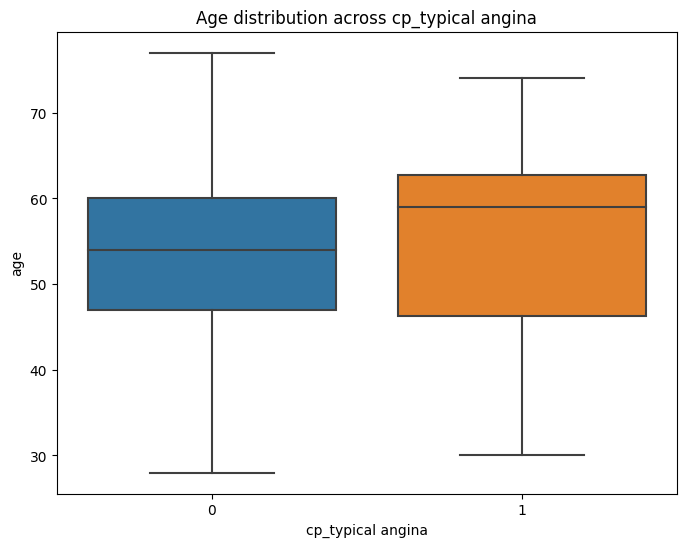

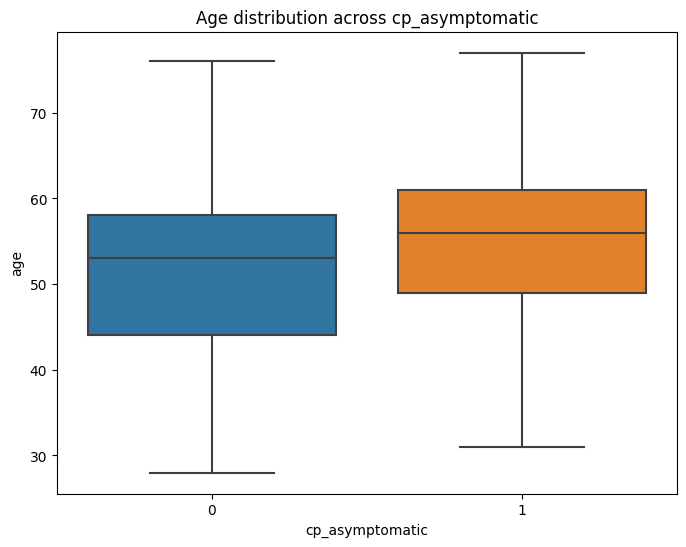

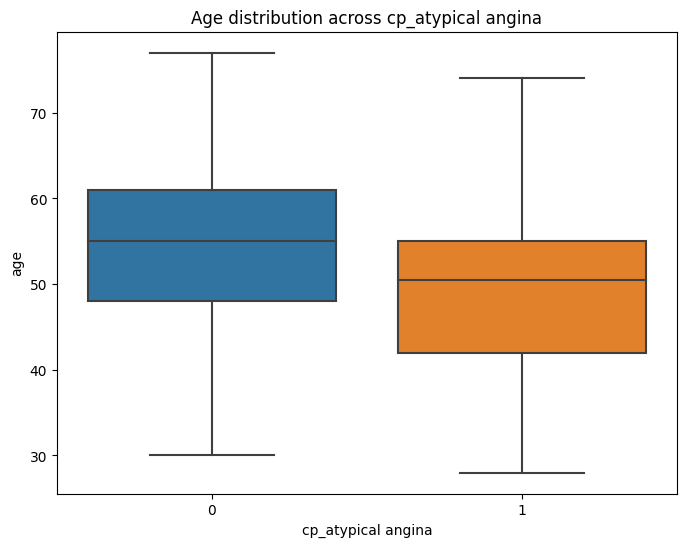

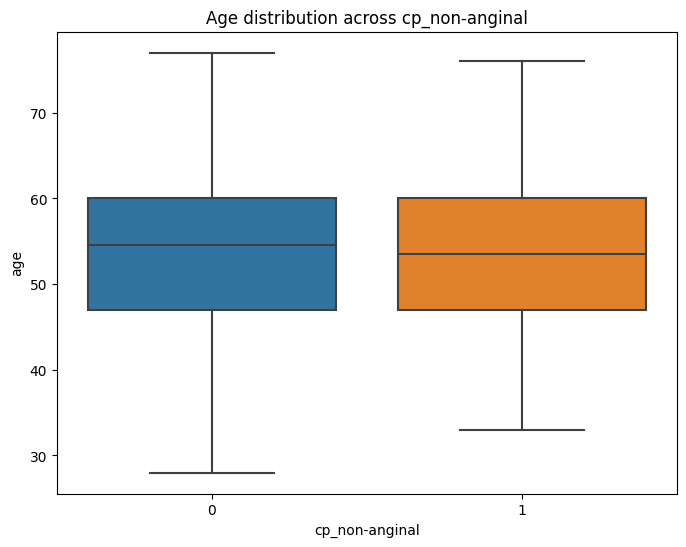

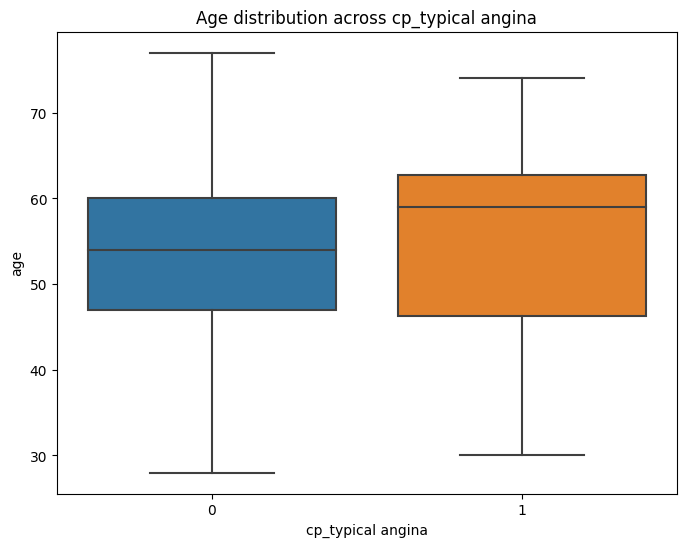

In [27]:
# Box plot of 'age' across different 'cp' types (chest pain types)
for col in cp_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)  # Replace 'age' with any numeric variable
    plt.title(f'Age distribution across {col}')
    plt.show()

# plot of 'age' across different 'cp' types (chest pain types)
for col in cp_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)  # Replace 'age' with any numeric variable
    plt.title(f'Age distribution across {col}')
    plt.show()





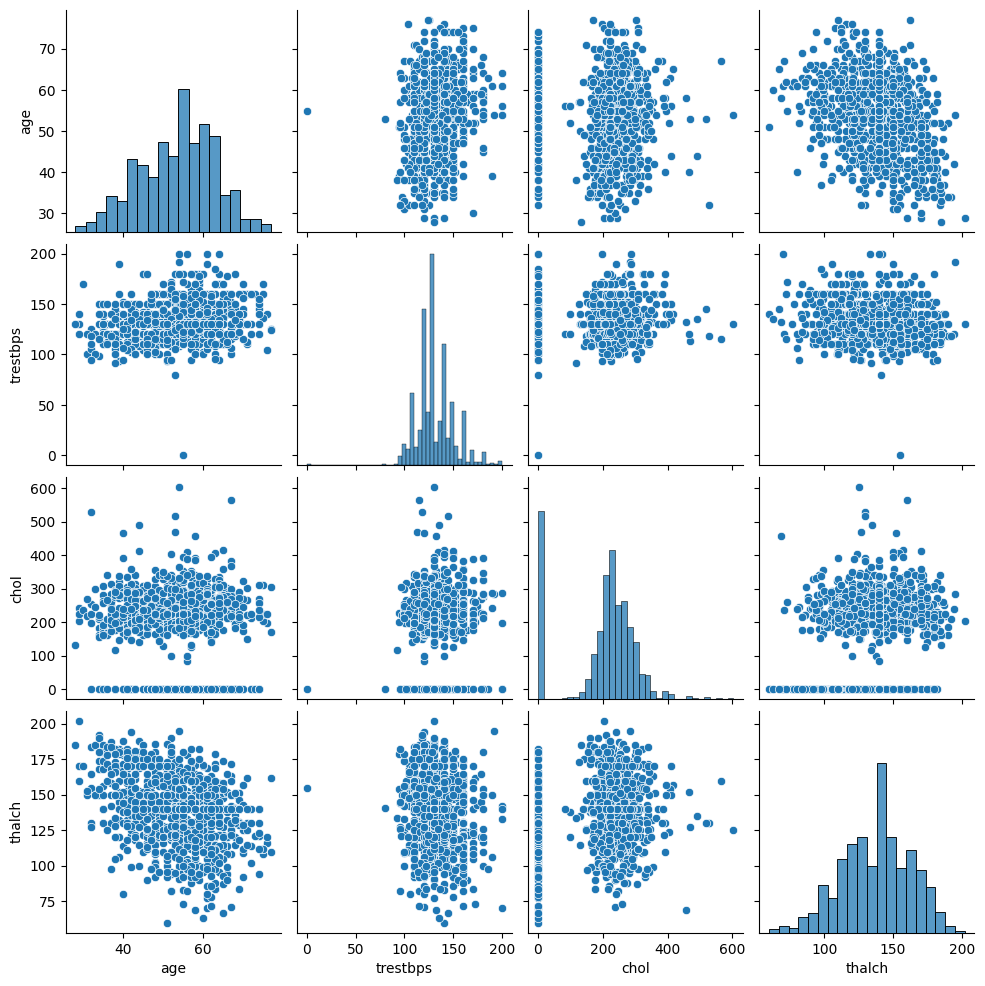

In [28]:
# Pair plot for a subset of numeric variables
sns.pairplot(df[numeric_columns])
plt.show()

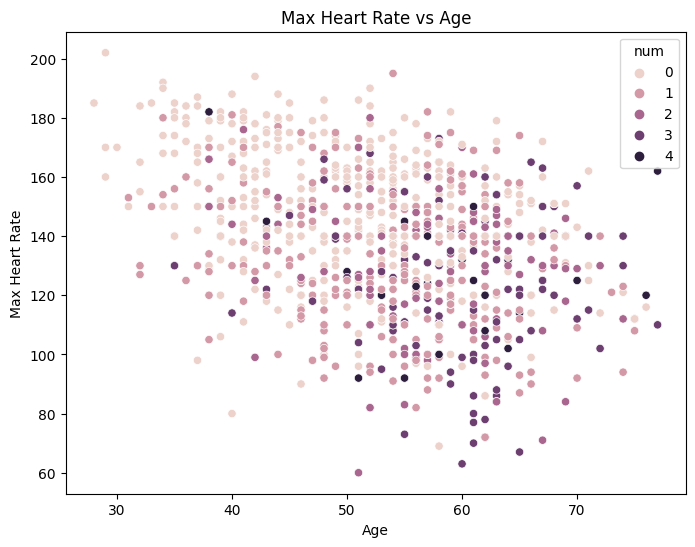

In [29]:
# Scatter plot for specific variables
# Example: Scatter plot of 'thalch' vs 'age'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalch', data=df, hue='num')  # 'num' is the target variable
plt.title('Max Heart Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

In [30]:
# Models
log_reg = LogisticRegression(max_iter=10000)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
svm_model = SVC()
knn_model = KNeighborsClassifier()

In [33]:
# KNN Model Tuning:

# Define a parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform Grid Search
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train_imputed, y_train)
best_knn = grid_search_knn.best_estimator_

In [35]:
# SVM Model Tuning:

# Define a parameter grid for SVM
param_grid_svm = {
    'C': [1, 10],  # Reduced range
    'kernel': ['rbf'],  # Only using the RBF kernel
    'gamma': ['scale']  # Using only 'scale'
}

# Perform Grid Search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train_imputed, y_train)
best_svm = grid_search_svm.best_estimator_

In [36]:
# Random Forest Model Tuning:

# Random Forest hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=rand_forest, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train_imputed, y_train)
best_rf = grid_search_rf.best_estimator_


In [37]:
# Decision Tree Model Tuning:

# Decision Tree hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Decision Tree
grid_search_dt = GridSearchCV(estimator=dec_tree, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train_imputed, y_train)
best_dt = grid_search_dt.best_estimator_

In [38]:
# Logistic Regression Model Tuning:

# Logistic Regression hyperparameter grid
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}

# Grid Search for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train_imputed, y_train)
best_lr = grid_search_lr.best_estimator_

In [39]:
# Updated models dictionary with best estimators
models = {
    'Logistic Regression': best_lr,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'SVM': best_svm,
    'KNN': best_knn
}

# Train and evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    interval = 1.96 * np.sqrt((accuracy * (1 - accuracy)) / len(y_test))
    confidence_interval = (accuracy - interval, accuracy + interval)
    report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")
    print(confidence_interval)
    print("\n")

Model: Logistic Regression
Accuracy: 0.5380434782608695
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        75
           1       0.45      0.46      0.45        54
           2       0.17      0.04      0.06        25
           3       0.31      0.15      0.21        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.31      0.32      0.29       184
weighted avg       0.46      0.54      0.48       184

Confusion Matrix:
[[69  5  1  0  0]
 [25 25  1  3  0]
 [ 4 16  1  4  0]
 [10 10  2  4  0]
 [ 1  0  1  2  0]]


(0.46600634908297733, 0.6100806074387617)


Model: Decision Tree
Accuracy: 0.5380434782608695
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        75
           1       0.46      0.39      0.42        54
           2       0.36      0.40      0.

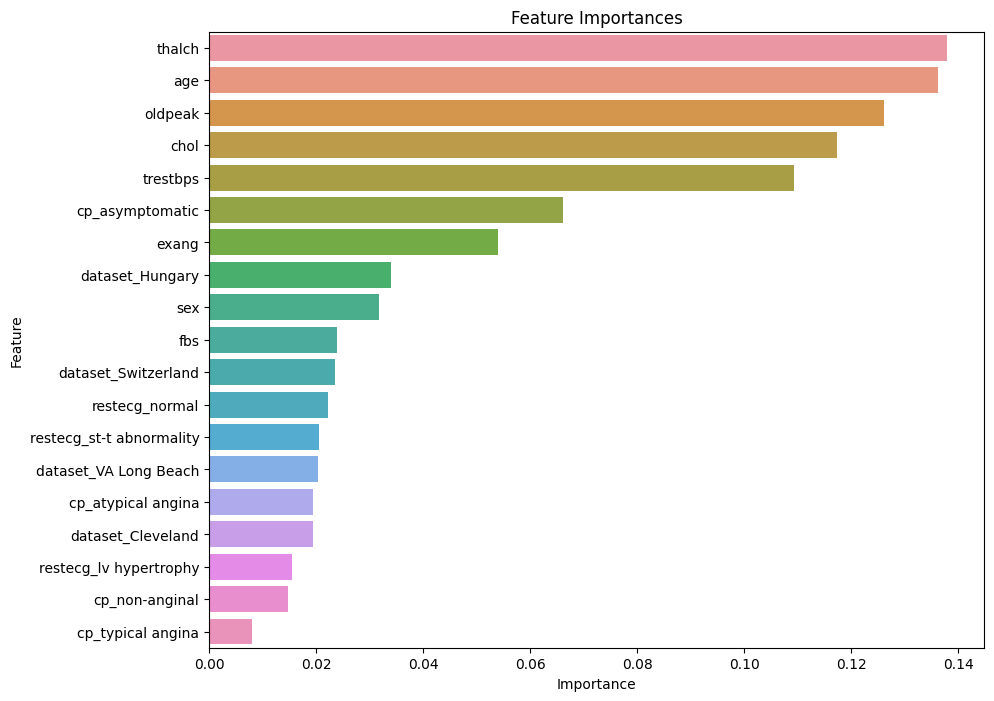

In [43]:
# Random Forest is used as it was the bestt model
feature_importances = best_rf.feature_importances_

# Getting feature names
feature_names = X_train.columns

# Creating a DataFrame for feature importances
importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sorting features by importance
importances = importances.sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()